<a href="https://colab.research.google.com/github/JoshuaZheng0/Tesla-Stock-Price-Prediction-Model/blob/main/tesla-trading-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Model Training and preprocessing libraries
# Model Training and preprocessing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
#Performance evaluation libraries


from google.colab import drive

In [ ]:

dataset_train = pd.read_csv("TSLA_train.csv")
dataset_train.isnull().sum()
#none of the values are missing for this data set so there's no need to fill in null values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#drop the Adj close column since it gives the same values as close
dataset_train.drop(columns = ['Adj Close'], inplace = True)
# create a new column that represents the percentage in price change
dataset_train['PC%'] = [0] * dataset_train.shape[0]
dataset_train['PC%'] = (dataset_train['Close'].diff()/dataset_train['Open'])*100
dataset_train

,Date,Open,High,Low,Close,Volume,PC%
0,6/29/2010,1.266667,1.666667,1.169333,1.592667,281494500,NaN
1,6/30/2010,1.719333,2.028000,1.553333,1.588667,257806500,-0.232648
2,7/1/2010,1.666667,1.728000,1.351333,1.464000,123282000,-7.480019
3,7/2/2010,1.533333,1.540000,1.247333,1.280000,77097000,-12.000003
4,7/6/2010,1.333333,1.333333,1.055333,1.074000,103003500,-15.450004
...,...,...,...,...,...,...,...
2767,6/25/2021,229.860001,231.270004,222.899994,223.956665,97490100,-1.152880
2768,6/28/2021,223.880005,231.566666,223.440002,229.573334,64884600,2.508785
2769,6/29/2021,228.216660,229.169998,225.296661,226.919998,52143900,-1.162639
2770,6/30/2021,226.589996,230.936661,226.046661,226.566666,56774700,-0.155935


In [ ]:

#create rsi column
def rsi(ohlc: dataset_train, period: int = 14, round_rsi: bool = True):
    "Implements the RSI indicator as defined by TradingView on March 15, 2021."
    delta = ohlc["Close"].diff()

    up = delta.copy()
    up[up < 0] = 0
    up = pd.Series.ewm(up, alpha=1/period).mean()

    down = delta.copy()
    down[down > 0] = 0
    down *= -1
    down = pd.Series.ewm(down, alpha=1/period).mean()

    rsi = np.where(up == 0, 0, np.where(down == 0, 100, 100 - (100 / (1 + up / down))))

    return np.round(rsi, 2) if round_rsi else rsi

dataset_train['rsi'] = [0] * dataset_train.shape[0]
dataset_train['rsi'] = rsi(dataset_train)
dataset_train["PC%"]=dataset_train["PC%"].fillna(0)
dataset_train["rsi"]=dataset_train["rsi"].fillna(0)
# #the feature class represents tesla's change the following day
# dataset_train['class'] = [0] * dataset_train.shape[0]
# dataset_train['class'] = dataset_train['PC%'].apply(lambda x : x >= 0)
#if tesla grew class will be indicated as 1
# #if tesla plumeted class will be indicated as 0
# dataset_train["class"] = dataset_train["class"].replace(True, 1)
# dataset_train["class"] = dataset_train["class"].replace(False, 0)
# dataset_train['class'] = dataset_train['class'].shift(-1)
# dataset_train["class"]=dataset_train["class"].fillna(0)
# #if tesla grows for the nesxt 3 days next
# dataset_train['nextThreeDays'] = [0] * dataset_train.shape[0]
# dataset_train['nextThreeDays'] = (dataset_train['class']+dataset_train['class'].shift(-1)+dataset_train['class'].shift(-2))//3
# dataset_train["nextThreeDays"]=dataset_train["nextThreeDays"].fillna(0)
# dataset_train["nextThreeDays"].sum()
# #the growth of tesla in the past three days
# dataset_train['pastThreeDays'] = [0] * dataset_train.shape[0]
# dataset_train['pastThreeDays'] = (dataset_train['class'].shift(1)+dataset_train['class'].shift(2)+dataset_train['class'].shift(3))//3
# dataset_train["pastThreeDays"]=dataset_train["pastThreeDays"].fillna(0)
# dataset_train["pastThreeDays"].sum()
dataset_train

,Date,Open,High,Low,Close,Volume,PC%,rsi
0,6/29/2010,1.266667,1.666667,1.169333,1.592667,281494500,0.000000,0.00
1,6/30/2010,1.719333,2.028000,1.553333,1.588667,257806500,-0.232648,0.00
2,7/1/2010,1.666667,1.728000,1.351333,1.464000,123282000,-7.480019,0.00
3,7/2/2010,1.533333,1.540000,1.247333,1.280000,77097000,-12.000003,0.00
4,7/6/2010,1.333333,1.333333,1.055333,1.074000,103003500,-15.450004,0.00
...,...,...,...,...,...,...,...,...
2767,6/25/2021,229.860001,231.270004,222.899994,223.956665,97490100,-1.152880,63.45
2768,6/28/2021,223.880005,231.566666,223.440002,229.573334,64884600,2.508785,66.84
2769,6/29/2021,228.216660,229.169998,225.296661,226.919998,52143900,-1.162639,63.83
2770,6/30/2021,226.589996,230.936661,226.046661,226.566666,56774700,-0.155935,63.42


In [ ]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[  1.266667]
 [  1.719333]
 [  1.666667]
 ...
 [228.21666 ]
 [226.589996]
 [227.973328]]
(2772, 1)


<Axes: xlabel='rsi', ylabel='PC%'>

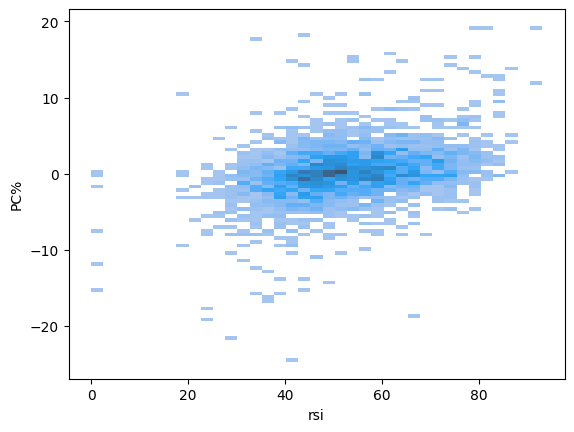

In [ ]:
sns.histplot(y='PC%', x = 'rsi', data = dataset_train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[6.44035005e-04],
       [2.17305025e-03],
       [1.99515503e-03],
       ...,
       [7.67235737e-01],
       [7.61741191e-01],
       [7.66413810e-01]])

In [ ]:
X_train = []
y_train = []
for i in range(60,2772):
  X_train.append(scaled_training_set[i-60:i,0])
  y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(2712, 60)
(2712,)


In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

X_train.shape

(2712, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 10, batch_size = 2720)

Epoch 1/10
1/1 [==============================] - 15s 15s/step - loss: 0.0451
Epoch 2/10
1/1 [==============================] - 6s 6s/step - loss: 0.0363
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.0284
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.0216
Epoch 5/10
1/1 [==============================] - 4s 4s/step - loss: 0.0175
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.0150
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.0121
Epoch 8/10
1/1 [==============================] - 3s 3s/step - loss: 0.0076
Epoch 9/10
1/1 [==============================] - 4s 4s/step - loss: 0.0032
Epoch 10/10
1/1 [==============================] - 3s 3s/step - loss: 0.0016


In [ ]:
dataset_test = pd.read_csv("TSLA_test.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = [ ]
for i in range(60,560):
  X_test.append(inputs[i-60:i,0])
X_test =np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
dataset_total = dataset_test['Open']

inputs = dataset_total[len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
all_pred = []
all_inputs = np.ndarray(shape=( 500, 60, 1))

for i in range(500):
   X_test = [ ]
   X_test.append(inputs[0:60,0])
   X_test2 =np.array(X_test)

   all_pred.append(regressor.predict(np.reshape(X_test2,(X_test2.shape[0],X_test2.shape[1],1))))
   pred = scaler.inverse_transform(all_pred[i])
   pred = pred.reshape(-1,1)
   pred = scaler.transform(pred)

   inputs = np.append(inputs,pred[0])
   inputs = np.delete(inputs, 0)
   inputs = np.reshape(inputs,(inputs.shape[0],1))

   all_inputs[i] = inputs
all_inputs

1/1 [==============================] - 0s 38ms/step


array([[[0.61436781],
        [0.6177118 ],
        [0.62571722],
        ...,
        [0.93569789],
        [0.93684634],
        [0.78818035]],

       [[0.6177118 ],
        [0.62571722],
        [0.62852075],
        ...,
        [0.93684634],
        [0.78818035],
        [0.79685247]],

       [[0.62571722],
        [0.62852075],
        [0.6013295 ],
        ...,
        [0.78818035],
        [0.79685247],
        [0.80508846]],

       ...,

       [[0.9557097 ],
        [0.95571989],
        [0.95572978],
        ...,
        [0.95612645],
        [0.95613146],
        [0.95613635]],

       [[0.95571989],
        [0.95572978],
        [0.95573956],
        ...,
        [0.95613146],
        [0.95613635],
        [0.95614129]],

       [[0.95572978],
        [0.95573956],
        [0.95574903],
        ...,
        [0.95613635],
        [0.95614129],
        [0.95614612]]])

In [ ]:
predicted_stock_price = regressor.predict(all_inputs)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


16/16 [==============================] - 1s 36ms/step


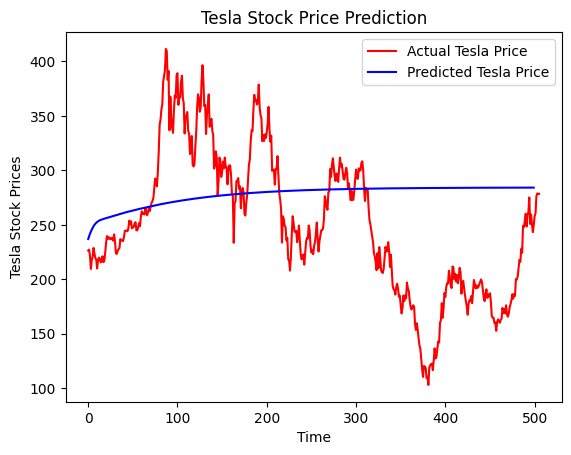

In [ ]:
plt.plot(actual_stock_price,color="red",label = 'Actual Tesla Price')
plt.plot(predicted_stock_price,color="blue",label = 'Predicted Tesla Price')
plt.title("Tesla Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Prices")
plt.legend()

In [ ]:
import sklearn


In [ ]:
sklearn.metrics.max_error(actual_stock_price[6:],predicted_stock_price)


In [ ]:
sklearn.metrics.explained_variance_score(actual_stock_price[6:],predicted_stock_price)

0.7304941061588652

In [ ]:
sklearn.metrics.r2_score(actual_stock_price[6:],predicted_stock_price)


0.7285514026739968